<a href="https://colab.research.google.com/github/pawel0508/MachineLearning_UcznieNienadzorowane/blob/main/HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set(font_scale = 1.3)

In [4]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples = 10, centers = 2, cluster_std = 1.0, center_box = (-8.0, 8.0), random_state = 42)[0]
df = pd.DataFrame(data, columns = ['x1', 'x2'])
df.head()

,x1,x2
0,1.986985,1.016248
1,-2.470776,6.745699
2,-0.428145,7.978864
3,2.699072,1.892783
4,-2.241511,6.977292


In [7]:
px.scatter(data_frame=df, x = 'x1', y = 'x2', template = 'simple_white')

Wykres z adnotacjami

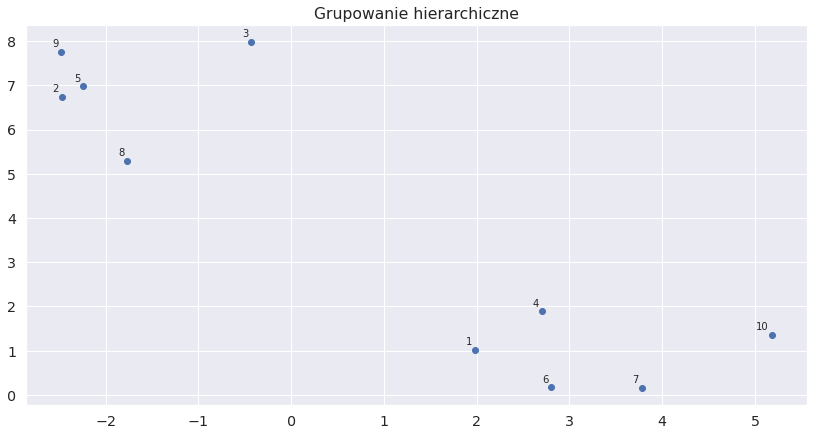

In [8]:
plt.figure(figsize=(14, 7))
plt.scatter(data[:,0], data[:,1])

for label, x, y in zip(range(1, 11), data[:, 0], data[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.title('Grupowanie hierarchiczne')
plt.show()

Wizualizacja dendrogram

In [9]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

Przeprowadzenie grupowania hierarchicznego

In [10]:
linked = linkage(data)


Wizualizacja drzewa hierarchicznego jako dendrogram

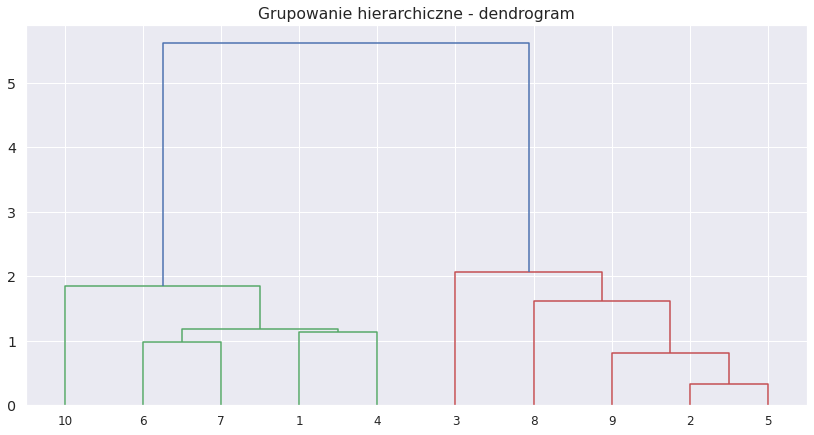

In [11]:
plt.figure(figsize = (14, 7))
dendrogram(linked, orientation = 'top', labels = range(1, 11), distance_sort = 'descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram') 
plt.show()

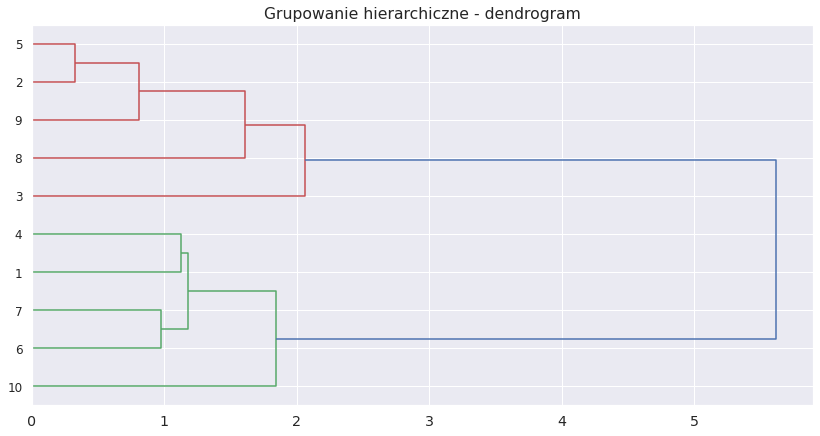

In [13]:
plt.figure(figsize = (14, 7))
dendrogram(linked, orientation = 'right', labels = range(1, 11), distance_sort = 'descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram') 
plt.show()

Gruowanie hierarchiczne

In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2)
cluster.fit_predict(data)

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

Wziualizacja klastrów

In [17]:
df = pd.DataFrame(data = data, columns = ['x1', 'x2'])
df['cluster'] = cluster.labels_
fig = px.scatter(data_frame=df, x = 'x1', y = 'x2', color = 'cluster', template='simple_white',
                 title='Grupowanie hierarchiczne', color_continuous_midpoint=0.6)
fig.update_traces(marker_size = 12)
fig.show()


Porównanie metryk: Euclidesian i Manhattan

In [22]:
data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

cluster_euclidesian = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean')
cluster_euclidesian.fit(data)

df_euclidesian = pd.DataFrame(data, columns=['x1', 'x2'])
df_euclidesian['cluster'] = cluster_euclidesian.labels_

fig = px.scatter(df_euclidesian, 'x1', 'x2', 'cluster', width=950, height=500, template='simple_white',
                 title='Grupowanie hierarchiczne - metryka euklidesowa', color_continuous_midpoint=0.6)
fig.show()

In [24]:
data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

cluster_manhattan = AgglomerativeClustering(n_clusters = 4, affinity = 'manhattan', linkage = 'complete')
cluster_manhattan.fit(data)

df_manhattan = pd.DataFrame(data, columns=['x1', 'x2'])
df_manhattan['cluster'] = cluster_manhattan.labels_

fig = px.scatter(df_manhattan, 'x1', 'x2', 'cluster', width=950, height=500, template='simple_white',
                 title='Grupowanie hierarchiczne - metryka Manhattan', color_continuous_midpoint=0.6)
fig.show()

In [25]:
data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

cluster_cosine = AgglomerativeClustering(n_clusters = 4, affinity = 'cosine', linkage = 'complete')
cluster_cosine.fit(data)

df_cosine = pd.DataFrame(data, columns=['x1', 'x2'])
df_cosine['cluster'] = cluster_cosine.labels_

fig = px.scatter(df_cosine, 'x1', 'x2', 'cluster', width=950, height=500, template='simple_white',
                 title='Grupowanie hierarchiczne - metryka Cosine', color_continuous_midpoint=0.6)
fig.show()

In [28]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, column_titles=['Euclidean', 'Manhattan', 'Cosine'])

fig1 = px.scatter(df_euclidesian, 'x1', 'x2', 'cluster')['data'][0]
fig2 = px.scatter(df_manhattan, 'x1', 'x2', 'cluster')['data'][0]   
fig3 = px.scatter(df_cosine, 'x1', 'x2', 'cluster')['data'][0]                         

fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=1, col=2)
fig.add_trace(fig3, row=1, col=3)
fig.update_layout(template='simple_white')
fig.show()